In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('breast-cancer-wisconsin.data', header = None)
df.columns = ['ID', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
              'Marginal_adhesion', 'Single_apthelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
              'Normal_nucleoi', 'Mitoses', 'Class']
df

,ID,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_apthelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoi,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          699 non-null    int64 
 1   Clump_thickness             699 non-null    int64 
 2   Uniformity_of_cell_size     699 non-null    int64 
 3   Uniformity_of_cell_shape    699 non-null    int64 
 4   Marginal_adhesion           699 non-null    int64 
 5   Single_apthelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                 699 non-null    object
 7   Bland_chromatin             699 non-null    int64 
 8   Normal_nucleoi              699 non-null    int64 
 9   Mitoses                     699 non-null    int64 
 10  Class                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.Bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_nuclei, dtype: int64

In [12]:
df = df.replace('?', np.nan)
mode_bn = df['Bare_nuclei'].mode()
df['Bare_nuclei'] = df['Bare_nuclei'].fillna(mode_bn)

df['Bare_nuclei'] = df['Bare_nuclei'].astype('int64')

In [14]:
df.Bare_nuclei.value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_nuclei, dtype: int64

# Membuat SVM


In [15]:
X = df.drop(['ID', 'Class'], axis = 1)
y = df['Class']

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 10 )

In [22]:
ytest.shape

(140,)

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [41]:

# bikin SVM dengan kernel linear

svc_lin = SVC(kernel = 'linear')
svc_lin.fit(Xtrain, ytrain)
ypred_lin = svc_lin.predict(Xtest)

acc_svc_lin = accuracy_score(ytest, ypred_lin)
print(acc_svc_lin)

0.9642857142857143


In [42]:
# bikin SVM dengan kernel poly

svc_pol = SVC(kernel = 'poly')
svc_pol.fit(Xtrain, ytrain)
ypred_pol = svc_pol.predict(Xtest)

acc_svc_pol = accuracy_score(ytest, ypred_pol)
print(acc_svc_pol)

0.9571428571428572


In [43]:
# bikin SVM dengan kernel rbf

svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(Xtrain, ytrain)
ypred_rbf = svc_rbf.predict(Xtest)

acc_svc_rbf = accuracy_score(ytest, ypred_rbf)
print(acc_svc_rbf)

0.9642857142857143


# Contoh 2

In [45]:
df2 = pd.read_csv('apples_and_oranges.csv')
df2.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


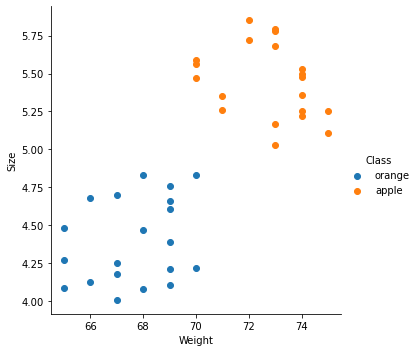

In [80]:
g = sns.FacetGrid(df2, hue = 'Class', height = 5)
g.map(plt.scatter, 'Weight', 'Size')
g.add_legend()

In [59]:
X2 = df2.drop(['Class'], axis = 1)
y2 = df2['Class']
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2,y2, test_size = 0.2, random_state =1 )

In [90]:
svc2 = SVC(kernel = 'rbf',C = 10, gamma = 'auto')
svc2.fit(Xtrain2, ytrain2)
ypred2 = svc2.predict(Xtest2)

In [91]:
print(accuracy_score(ytest2, ypred2))

0.875


In [92]:
ypred2

array(['orange', 'orange', 'apple', 'apple', 'orange', 'apple', 'orange',
       'apple'], dtype=object)

In [79]:
ytest2

2     orange
31    orange
3      apple
21    orange
27    orange
29     apple
22    orange
39     apple
Name: Class, dtype: object